### Plotting antiSMASH clusters for Figure 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from scipy.stats import fisher_exact

In [4]:
exp = pd.read_csv('../ref/CpSilv_gb_annotations_and_expression_data.csv').set_index('Unnamed: 0')
exp = exp[~exp['Beyhan_exp'].isna()]
spherule_genes = exp[(exp['Beyhan_exp']=='spherule_upreg')].index.tolist()
hyphae_genes = exp[(exp['Beyhan_exp']=='hyphae_upreg')].index.tolist()

len(spherule_genes),len(hyphae_genes), len(exp)

(1082, 1200, 7301)

In [8]:
antismash = exp[~(exp['antiSMASH'].isna())]

In [9]:
gff_path = '../ref/genbank_files/CpSilv.gff3'
gff = pd.read_csv(gff_path, sep='\t', header=None, comment='#')[[0,2,3,4,6,8]]
gff.columns = ['chrom', 'type', 'start', 'stop', 'direction', 'annotation']
gff = gff[gff['type'] == 'gene']
gff['gene'] = gff['annotation'].str.split(';',expand=True)[0].str.split("ID=gene-", expand=True)[1]
gff = gff[gff['gene'].isin(exp.index.tolist())]
gff.shape

(7301, 7)

In [10]:
spherule_color = '#48a1b5'
hyphae_color = '#cc9d58'
neutral_color = '#c7c7c7'

roman_dict = {1:'I',2:'II',3:'III',4:'IV', 5:'V'}

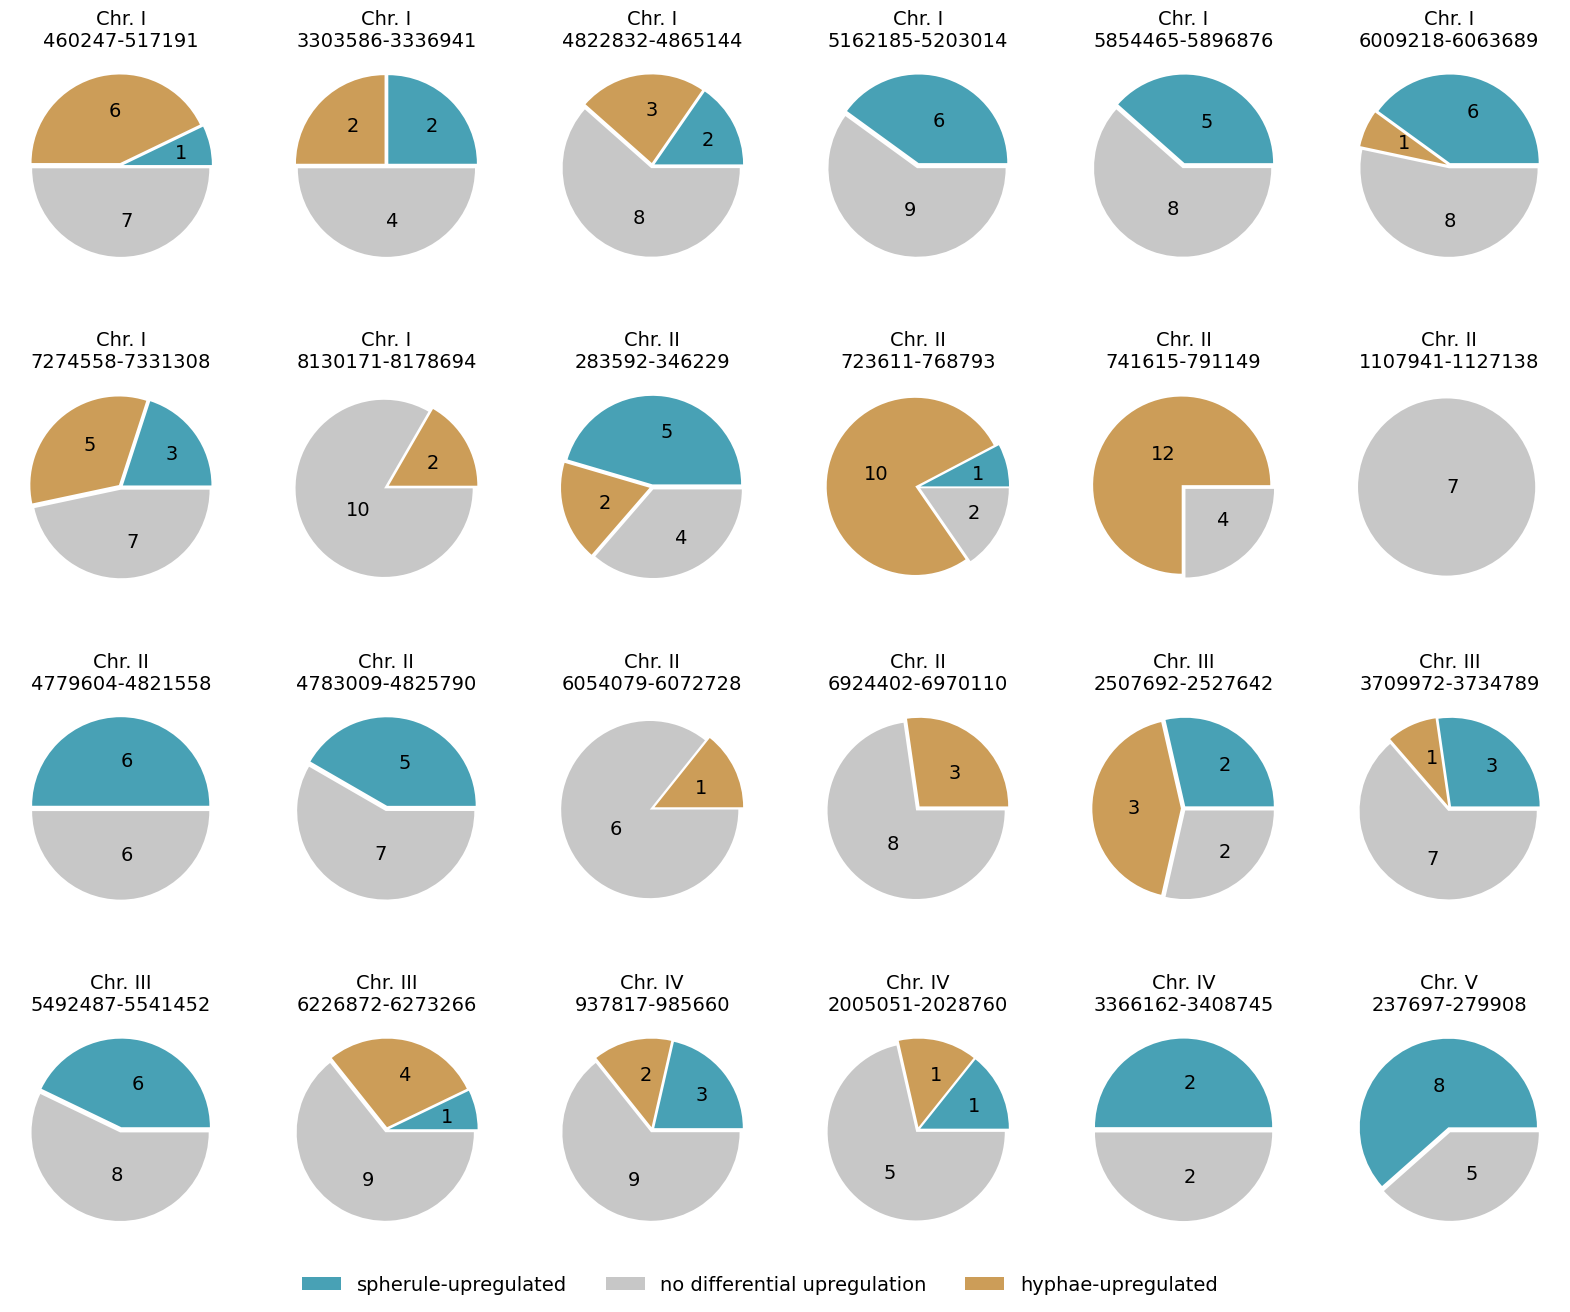

In [13]:
fig,ax = plt.subplots(4, 6, figsize=(20, 16))

explode = 0.03
colors = np.array([spherule_color, hyphae_color, neutral_color])
row, col = 0, 0
clusters = [i for i in antismash['antiSMASH'].unique() if ';' not in i]

for cluster in sorted(clusters):
    
    temp = antismash[antismash['antiSMASH'].str.contains(cluster)]

    prop_spherule_up = temp[temp['Beyhan_exp']=='spherule_upreg'].shape[0]/temp.shape[0]
    prop_hyphae_up = temp[temp['Beyhan_exp']=='hyphae_upreg'].shape[0]/temp.shape[0]
    prop_not_diff = temp[temp['Beyhan_exp']=='no upreg'].shape[0]/temp.shape[0]

    
    spherule_up = temp[temp['Beyhan_exp']=='spherule_upreg'].shape[0]
    hyphae_up = temp[temp['Beyhan_exp']=='hyphae_upreg'].shape[0]
    no_up = temp[temp['Beyhan_exp']=='no upreg'].shape[0]
    
    counts = np.array([spherule_up, hyphae_up, no_up])
    index_to_plot = np.where(counts != 0)
    
    
    if len(index_to_plot[0]) == 1:
        labeldistance = 0
        
    elif len(index_to_plot[0]) == 2:
        labeldistance = .5
        
    else:
        labeldistance = 0.6
    
    ax[row, col].pie(counts[index_to_plot], colors=colors[index_to_plot],
         labeldistance=labeldistance, labels=counts[index_to_plot], explode=[explode]*len(index_to_plot[0]),
        textprops = dict(rotation_mode = 'anchor', va='center', ha='left', color='black', fontsize=14),
)
    
    
    temp_gff = gff[gff['gene'].isin(temp.index.tolist())]
    chrom = cluster.split('_')[1][0]
    start_coord = temp_gff['start'].min()
    end_coord = temp_gff['stop'].max()
    
    ax[row, col].set_title('Chr. {}\n{}-{}'.format(roman_dict[int(chrom)], start_coord, end_coord), fontsize=14)

    col+=1
    
    if col == 6:
        col = 0
        row += 1

        
handles, labels = ax[0,0].get_legend_handles_labels()
legend_labels = ['spherule-upregulated', 'hyphae-upregulated', 'no differential upregulation']

fig.legend([handles[0],handles[2],handles[1]], [legend_labels[0], legend_labels[2],legend_labels[1]],  
           loc='lower center', frameon=False, ncol=3, fontsize=14, bbox_to_anchor=(0.5, .08))


plt.savefig('../figures/fig1_antiSMASH_raw.png', dpi=300)
plt.show() 
    